# Plot the wavelet spectra, particle motions, and polarization analyses of the harmonic tremors recorded on a station

In [1]:
# Imports
from pandas import Timestamp, Timedelta
from matplotlib.pyplot import subplots
from matplotlib.ticker import MultipleLocator
from numpy import geomspace

from utils_basic import time2filename
from utils_basic import PM_COMPONENT_PAIRS as component_pairs, ROOTDIR_GEO as rootdir
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import get_scales_and_freqs, get_stream_cwt
from utils_pol import get_pol_vidale
from utils_plot import get_windowed_pm_data, plot_3c_particle_motion_with_time, save_figure

In [2]:
# Inputs
## Data
station = "A05"
starttime = "2020-01-13T20:01:01.5Z"
dur = 10.0 # Duration in seconds

## Preprocessing
min_freq_filt = 40.0
max_freq_filt = 75.0

deci_factor = 2 # Decimation factor

## Wavelet transform
wavelet = "cmor"
bandwidth = 20.0
center_freq = 2.0
min_scales = 5
max_sacale = 50
num_scales = 128

window_length_pm = 1.0 # Window length for extracting particle motion in seconds
window_length_pol = 500 # Window length for polarization analysis in points

## Plotting
min_freq_plot = 40.0
max_freq_plot = 75.0

dbmin = 0.0
dbmax = 45.0



In [3]:
# Read and process the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, freqmin=min_freq_filt, freqmax=max_freq_filt, stations=station, normalize=True, decimate=True, decimate_factor=deci_factor)

In [4]:
# Compute the wavelet transform
scales, freqs = get_scales_and_freqs(wavelet, center_freq, bandwidth, min_scales, max_sacale, num_scales)
specs = get_stream_cwt(stream, wavelet=wavelet, bandwidth=bandwidth, center_freq=center_freq, scales=scales)

In [5]:
# Get the windowed particle motions
pm_data_list = get_windowed_pm_data(stream, window_length_pm)

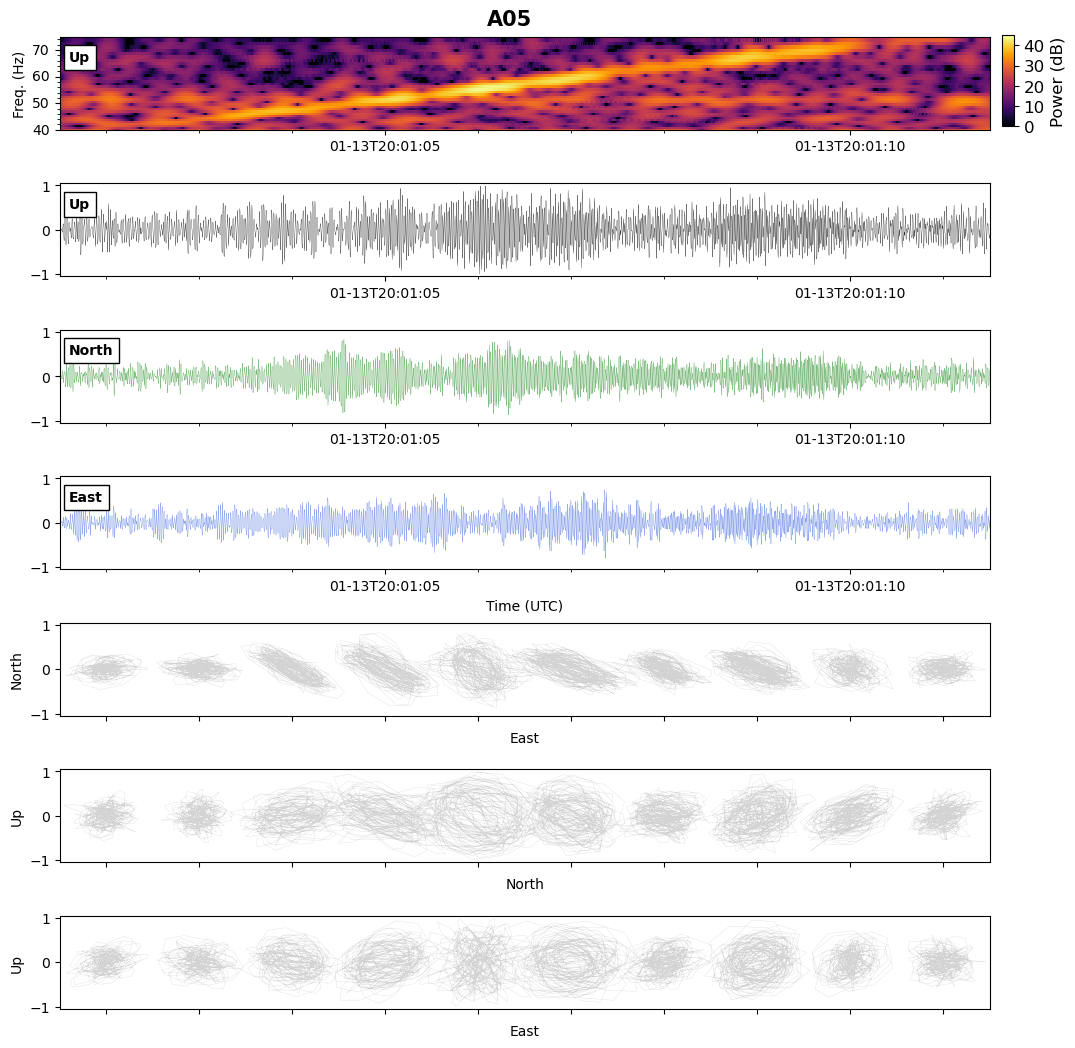

In [6]:
# Plot the waveforms and particle motions
fig, axes, cbar = plot_3c_particle_motion_with_time(stream, specs, pm_data_list, freqmin=min_freq_plot, freqmax=max_freq_plot, dbmax=dbmax, dbmin=dbmin, major_time_spacing=5.0, minor_time_spacing=1.0, major_freq_spacing=10.0, minor_freq_spacing=2.0)
                    

In [7]:
# Save the figure
timestr = time2filename(starttime)
figname = f"high_q_glider_pm_with_time_{timestr}_{station}.png"

save_figure(fig, figname, outdir=rootdir)

Figure saved to /Volumes/OmanData/data/geophones/high_q_glider_pm_with_time_20200113T200101_A05.png
